# IMPORT



In [222]:
# Library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [223]:
raw_df = pd.read_csv("../dataset/Bank Target Marketing Dataset.csv")

## Splitting di awal biar ga kena data leakage 

In [224]:
df, test = train_test_split(
    raw_df,
    test_size=0.2,
    random_state=42
)

In [225]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
6211,42,admin.,married,primary,no,1547,yes,yes,unknown,27,may,272,3,-1,0,unknown,no
12005,39,blue-collar,married,secondary,no,72,yes,no,unknown,7,may,425,6,-1,0,unknown,no
44250,42,blue-collar,married,unknown,no,732,yes,no,telephone,20,apr,33,1,339,1,failure,no
33007,38,technician,single,secondary,no,367,no,no,cellular,20,aug,128,2,-1,0,unknown,no
45629,44,services,divorced,secondary,no,-368,yes,no,cellular,5,may,895,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44732,36,housemaid,divorced,secondary,no,-289,no,no,cellular,20,apr,400,2,-1,0,unknown,no
54343,38,services,single,secondary,no,91,no,no,cellular,2,mar,207,1,-1,0,unknown,yes
38158,30,services,single,secondary,no,62,yes,no,cellular,21,nov,76,1,-1,0,unknown,no
860,51,retired,married,tertiary,no,746,no,no,cellular,25,aug,372,5,-1,0,unknown,yes


In [226]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
21713,35,services,married,secondary,no,373,no,yes,unknown,16,jun,162,6,-1,0,unknown,no
42071,26,admin.,single,secondary,no,255,no,no,cellular,9,feb,190,1,-1,0,unknown,yes
40993,47,entrepreneur,divorced,tertiary,no,178,no,no,cellular,4,feb,291,1,-1,0,unknown,no
30148,58,management,married,tertiary,no,9683,no,no,cellular,4,aug,857,2,-1,0,unknown,no
6390,51,management,single,unknown,no,-461,yes,no,unknown,28,may,33,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21755,48,unemployed,single,tertiary,no,3229,no,no,unknown,16,jun,1089,1,-1,0,unknown,yes
52346,25,entrepreneur,single,tertiary,no,347,no,no,cellular,20,aug,267,1,-1,0,unknown,yes
49852,51,management,single,tertiary,no,297,yes,no,cellular,15,may,415,4,375,1,failure,yes
8658,26,services,divorced,primary,no,633,yes,no,unknown,27,may,326,2,-1,0,unknown,no


In [227]:
test.to_csv('../dataset/test_df.csv', index=False)

# EDA



## General

In [228]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
6211,42,admin.,married,primary,no,1547,yes,yes,unknown,27,may,272,3,-1,0,unknown,no
12005,39,blue-collar,married,secondary,no,72,yes,no,unknown,7,may,425,6,-1,0,unknown,no
44250,42,blue-collar,married,unknown,no,732,yes,no,telephone,20,apr,33,1,339,1,failure,no
33007,38,technician,single,secondary,no,367,no,no,cellular,20,aug,128,2,-1,0,unknown,no
45629,44,services,divorced,secondary,no,-368,yes,no,cellular,5,may,895,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44732,36,housemaid,divorced,secondary,no,-289,no,no,cellular,20,apr,400,2,-1,0,unknown,no
54343,38,services,single,secondary,no,91,no,no,cellular,2,mar,207,1,-1,0,unknown,yes
38158,30,services,single,secondary,no,62,yes,no,cellular,21,nov,76,1,-1,0,unknown,no
860,51,retired,married,tertiary,no,746,no,no,cellular,25,aug,372,5,-1,0,unknown,yes


In [229]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45098.000000,45098.000000,45098.000000,45098.000000,45098.000000,45098.000000,45098.000000
mean,40.971041,1388.578584,15.767595,281.016630,2.717038,42.313162,0.624662
std,10.898329,3079.993157,8.339822,281.949538,3.035283,101.781040,1.991086
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,82.000000,8.000000,108.000000,1.000000,-1.000000,0.000000
50%,39.000000,470.000000,16.000000,192.000000,2.000000,-1.000000,0.000000
75%,48.000000,1487.000000,21.000000,347.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,58.000000


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45098 entries, 6211 to 15795
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45098 non-null  int64 
 1   job        45098 non-null  object
 2   marital    45098 non-null  object
 3   education  45098 non-null  object
 4   default    45098 non-null  object
 5   balance    45098 non-null  int64 
 6   housing    45098 non-null  object
 7   loan       45098 non-null  object
 8   contact    45098 non-null  object
 9   day        45098 non-null  int64 
 10  month      45098 non-null  object
 11  duration   45098 non-null  int64 
 12  campaign   45098 non-null  int64 
 13  pdays      45098 non-null  int64 
 14  previous   45098 non-null  int64 
 15  poutcome   45098 non-null  object
 16  deposit    45098 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [231]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [232]:
for col in df.columns:
    if df[col].dtype == 'object':
        unique_counts = df[col].value_counts()
        print(unique_counts)
        print()

job
management       9616
blue-collar      9354
technician       7578
admin.           5155
services         4077
retired          2455
self-employed    1593
entrepreneur     1448
unemployed       1315
housemaid        1206
student          1019
unknown           282
Name: count, dtype: int64

marital
married     26789
single      13129
divorced     5180
Name: count, dtype: int64

education
secondary    22989
tertiary     13561
primary       6668
unknown       1880
Name: count, dtype: int64

default
no     44332
yes      766
Name: count, dtype: int64

housing
yes    24354
no     20744
Name: count, dtype: int64

loan
no     38151
yes     6947
Name: count, dtype: int64

contact
cellular     29810
unknown      12331
telephone     2957
Name: count, dtype: int64

month
may    13324
jul     6723
aug     6142
jun     5242
nov     3937
apr     3081
feb     2736
jan     1401
oct      902
sep      735
mar      615
dec      260
Name: count, dtype: int64

poutcome
unknown    36217
failure     4915

## Visualization

### Donut Chart
For categorical attributes

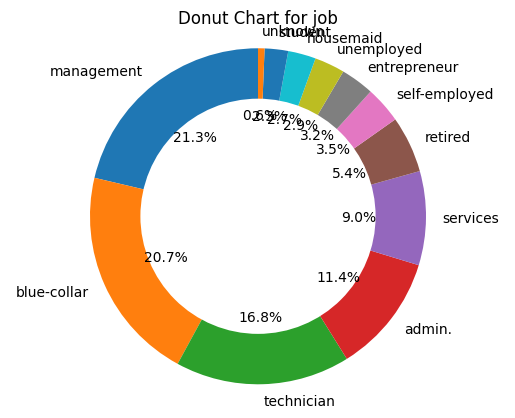

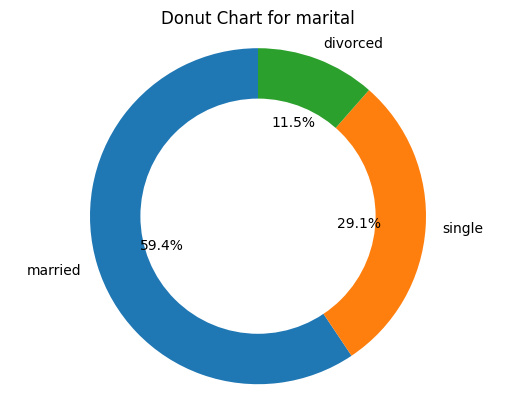

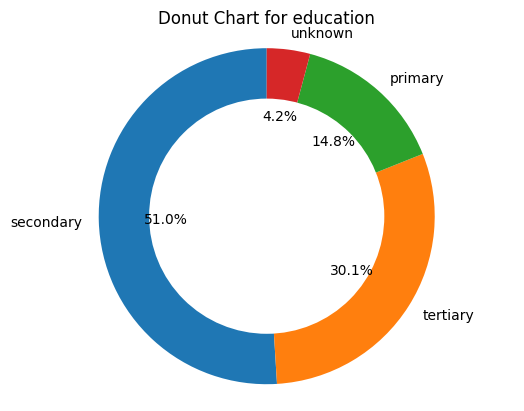

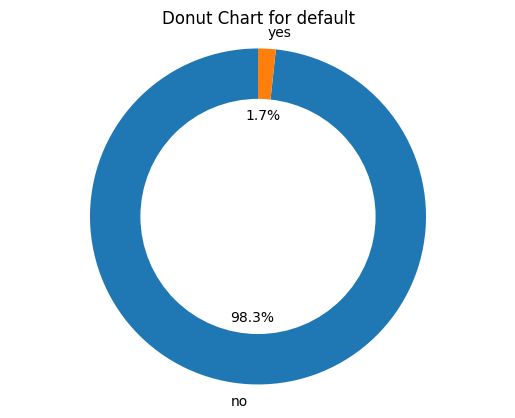

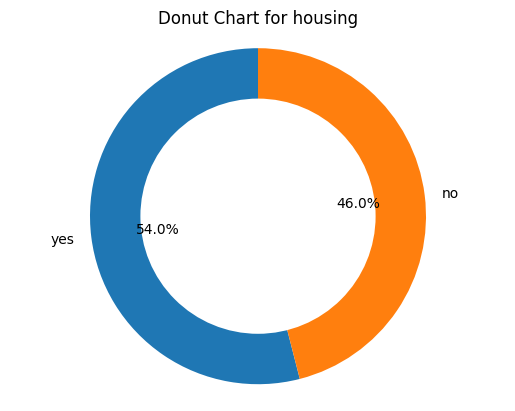

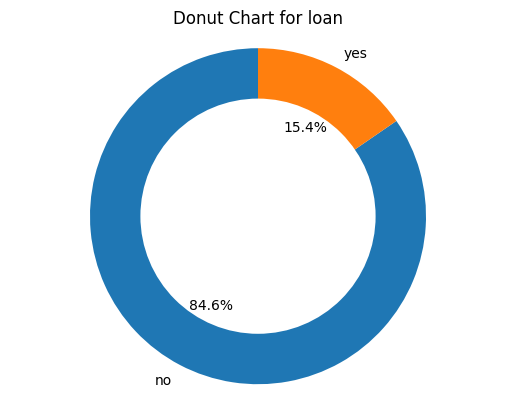

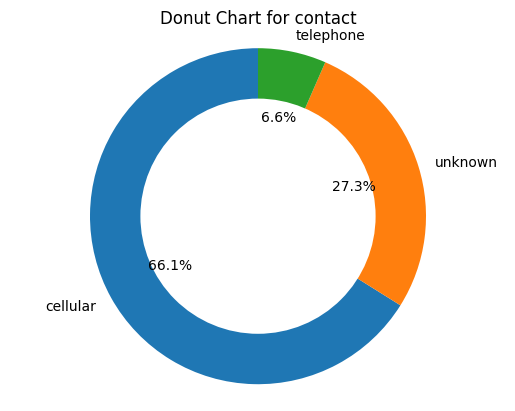

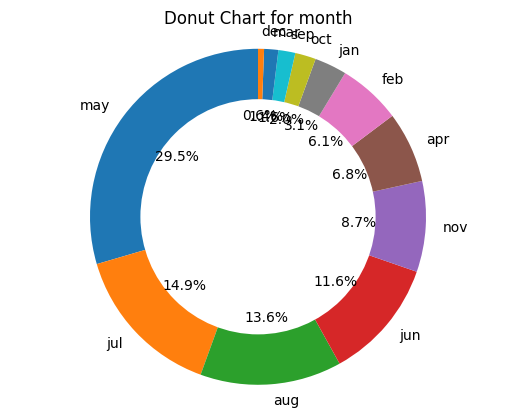

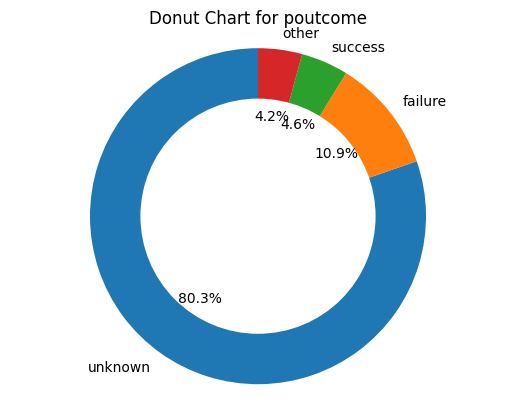

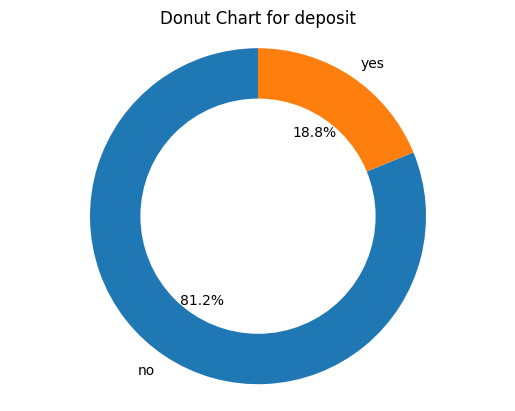

In [233]:
for col in df.columns:
    if df[col].dtype == 'object':
        value_counts = df[col].value_counts()
        plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'Donut Chart for {col}')
        centre_circle = plt.Circle((0, 0), 0.70, fc='white')
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)
        plt.axis('equal') 
        plt.show()

### Bar Chart
For numerical attributes

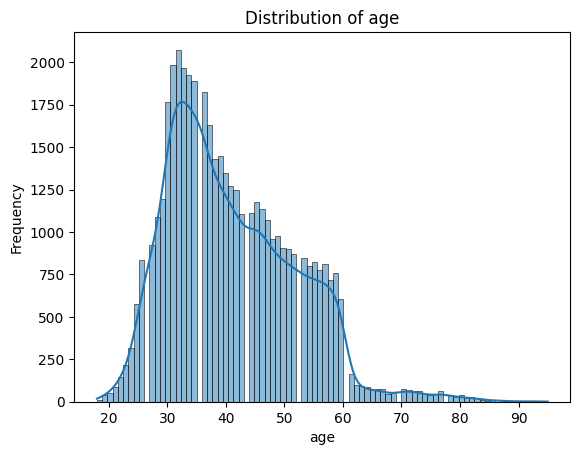

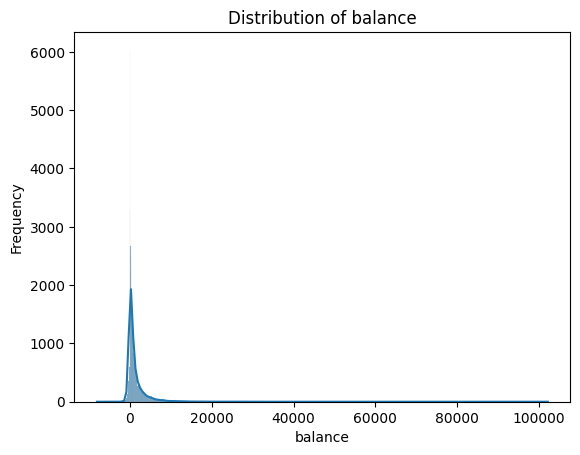

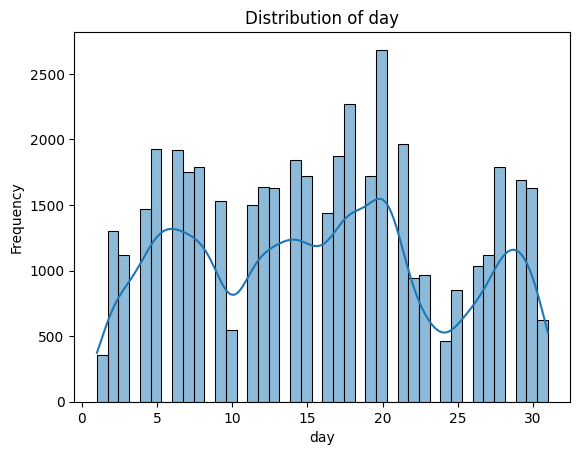

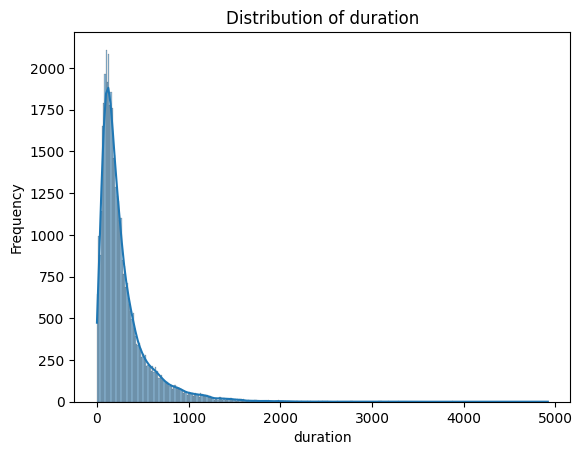

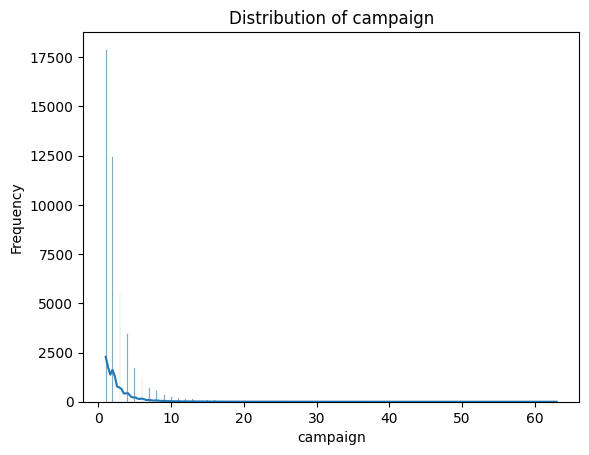

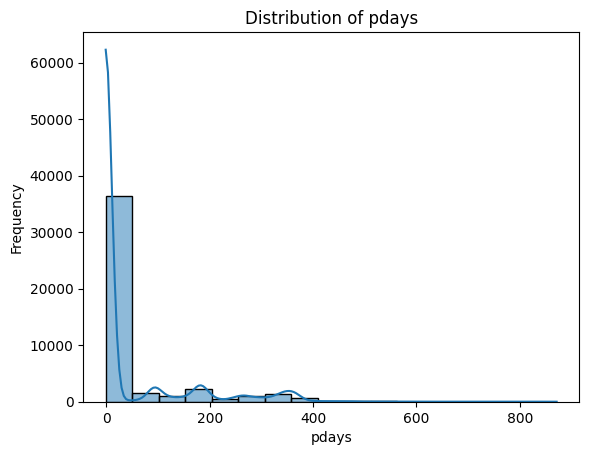

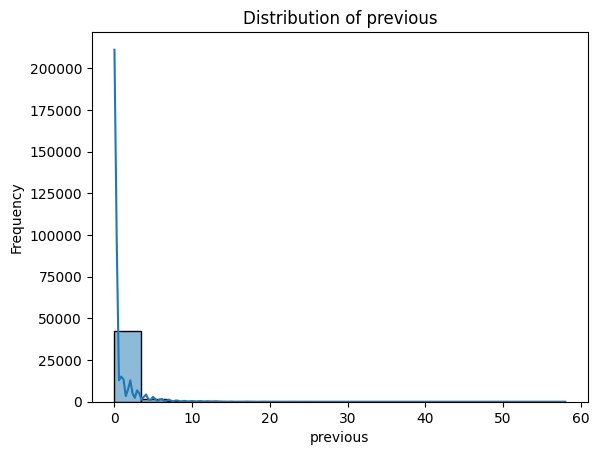

In [234]:
for column in df.columns:
    if df[column].dtype == 'int64':
        plt.figure()  
        sns.histplot(df[column], kde=True) 
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

## Outliers

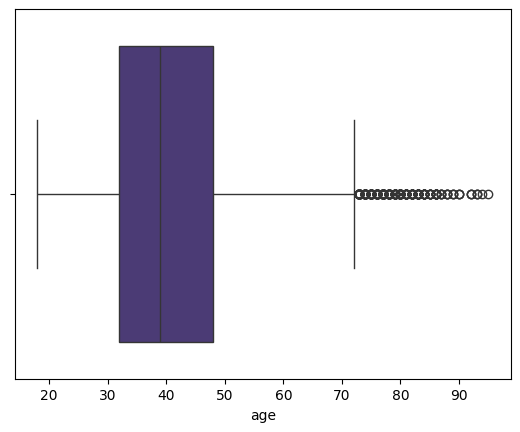

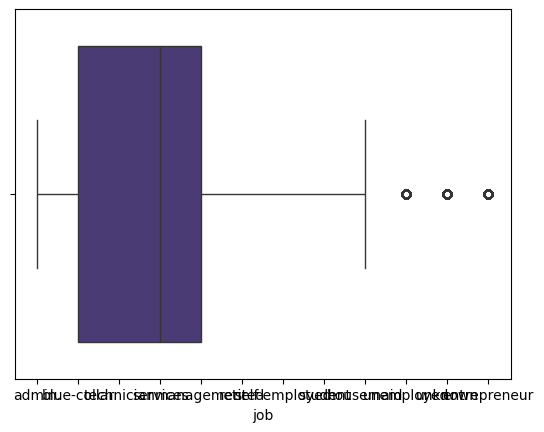

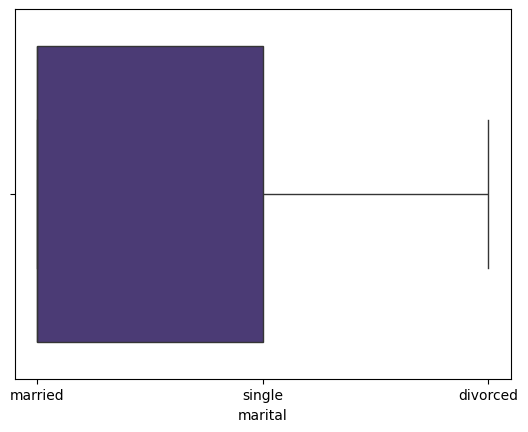

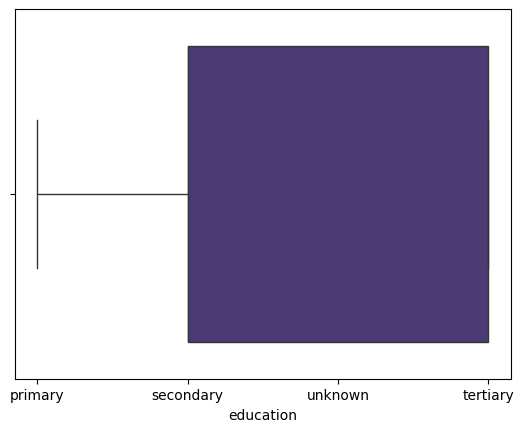

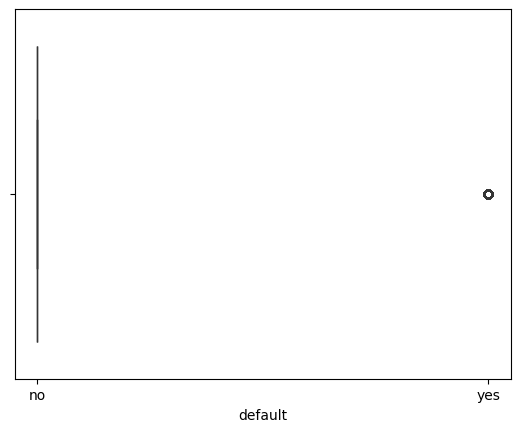

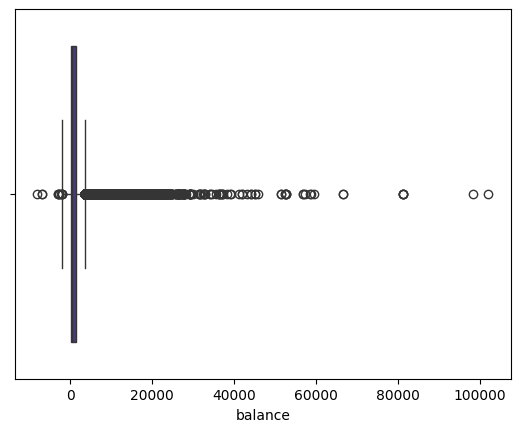

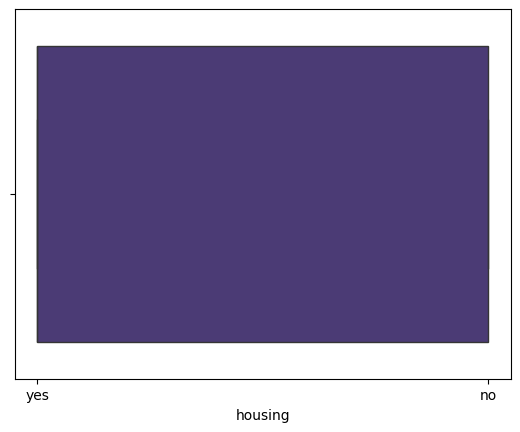

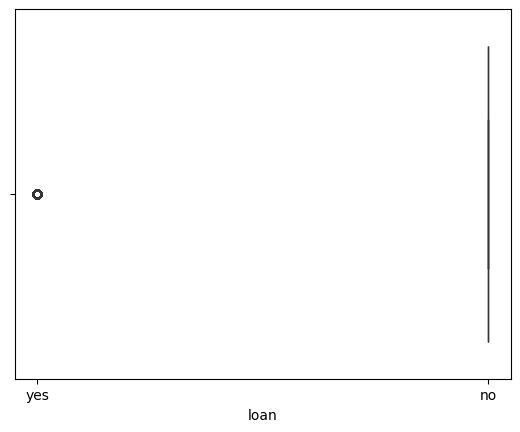

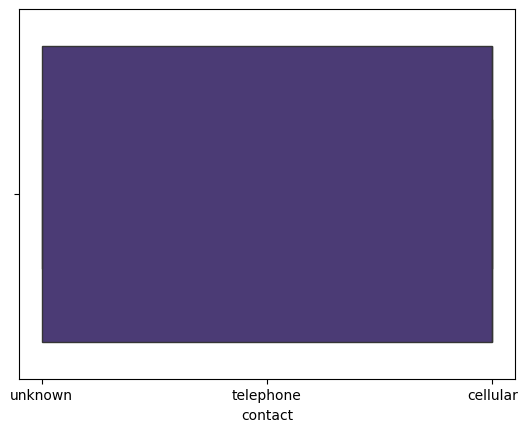

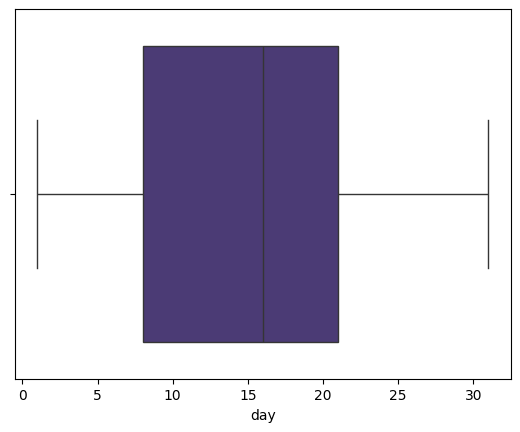

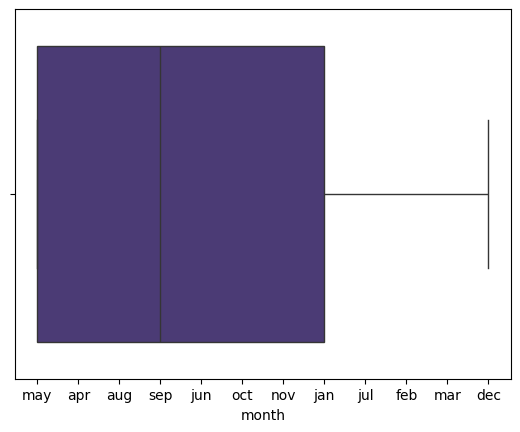

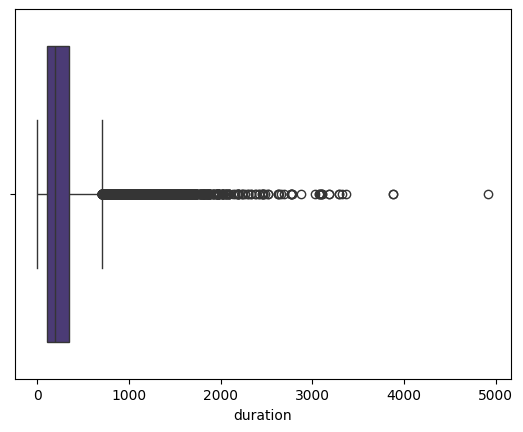

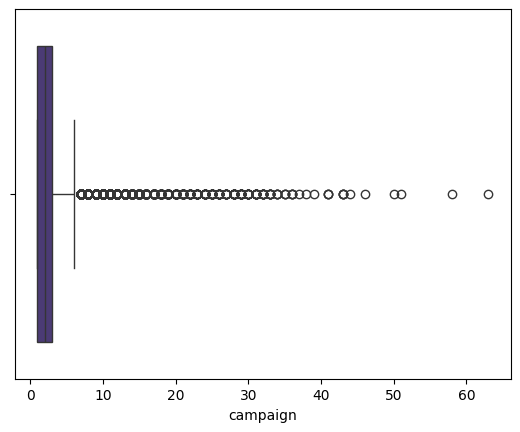

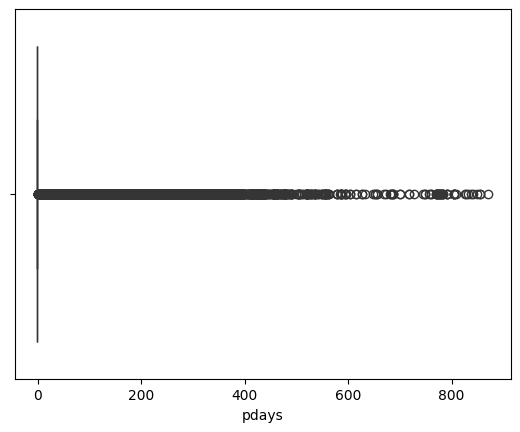

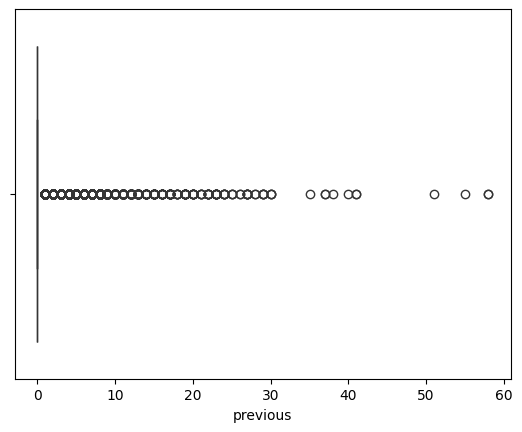

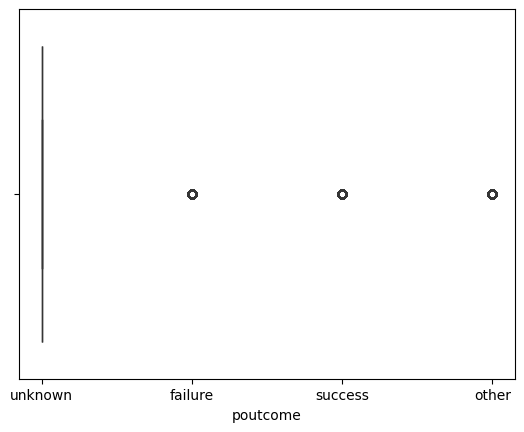

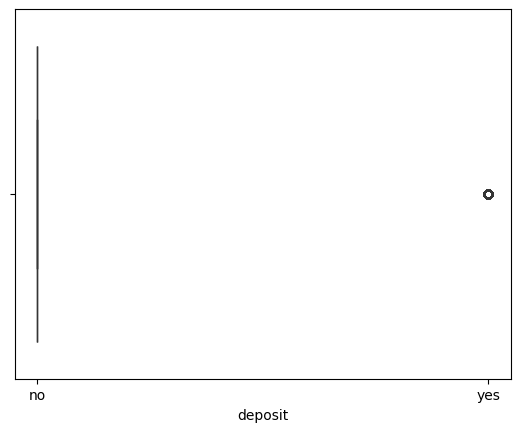

In [235]:
for col in df:
    plt.figure()
    sns.boxplot(df[col], color=sns.color_palette("viridis")[0], orient="h") 
    plt.xlabel(col)
    plt.show()

## Change target datatype

In [236]:
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

### Heatmap


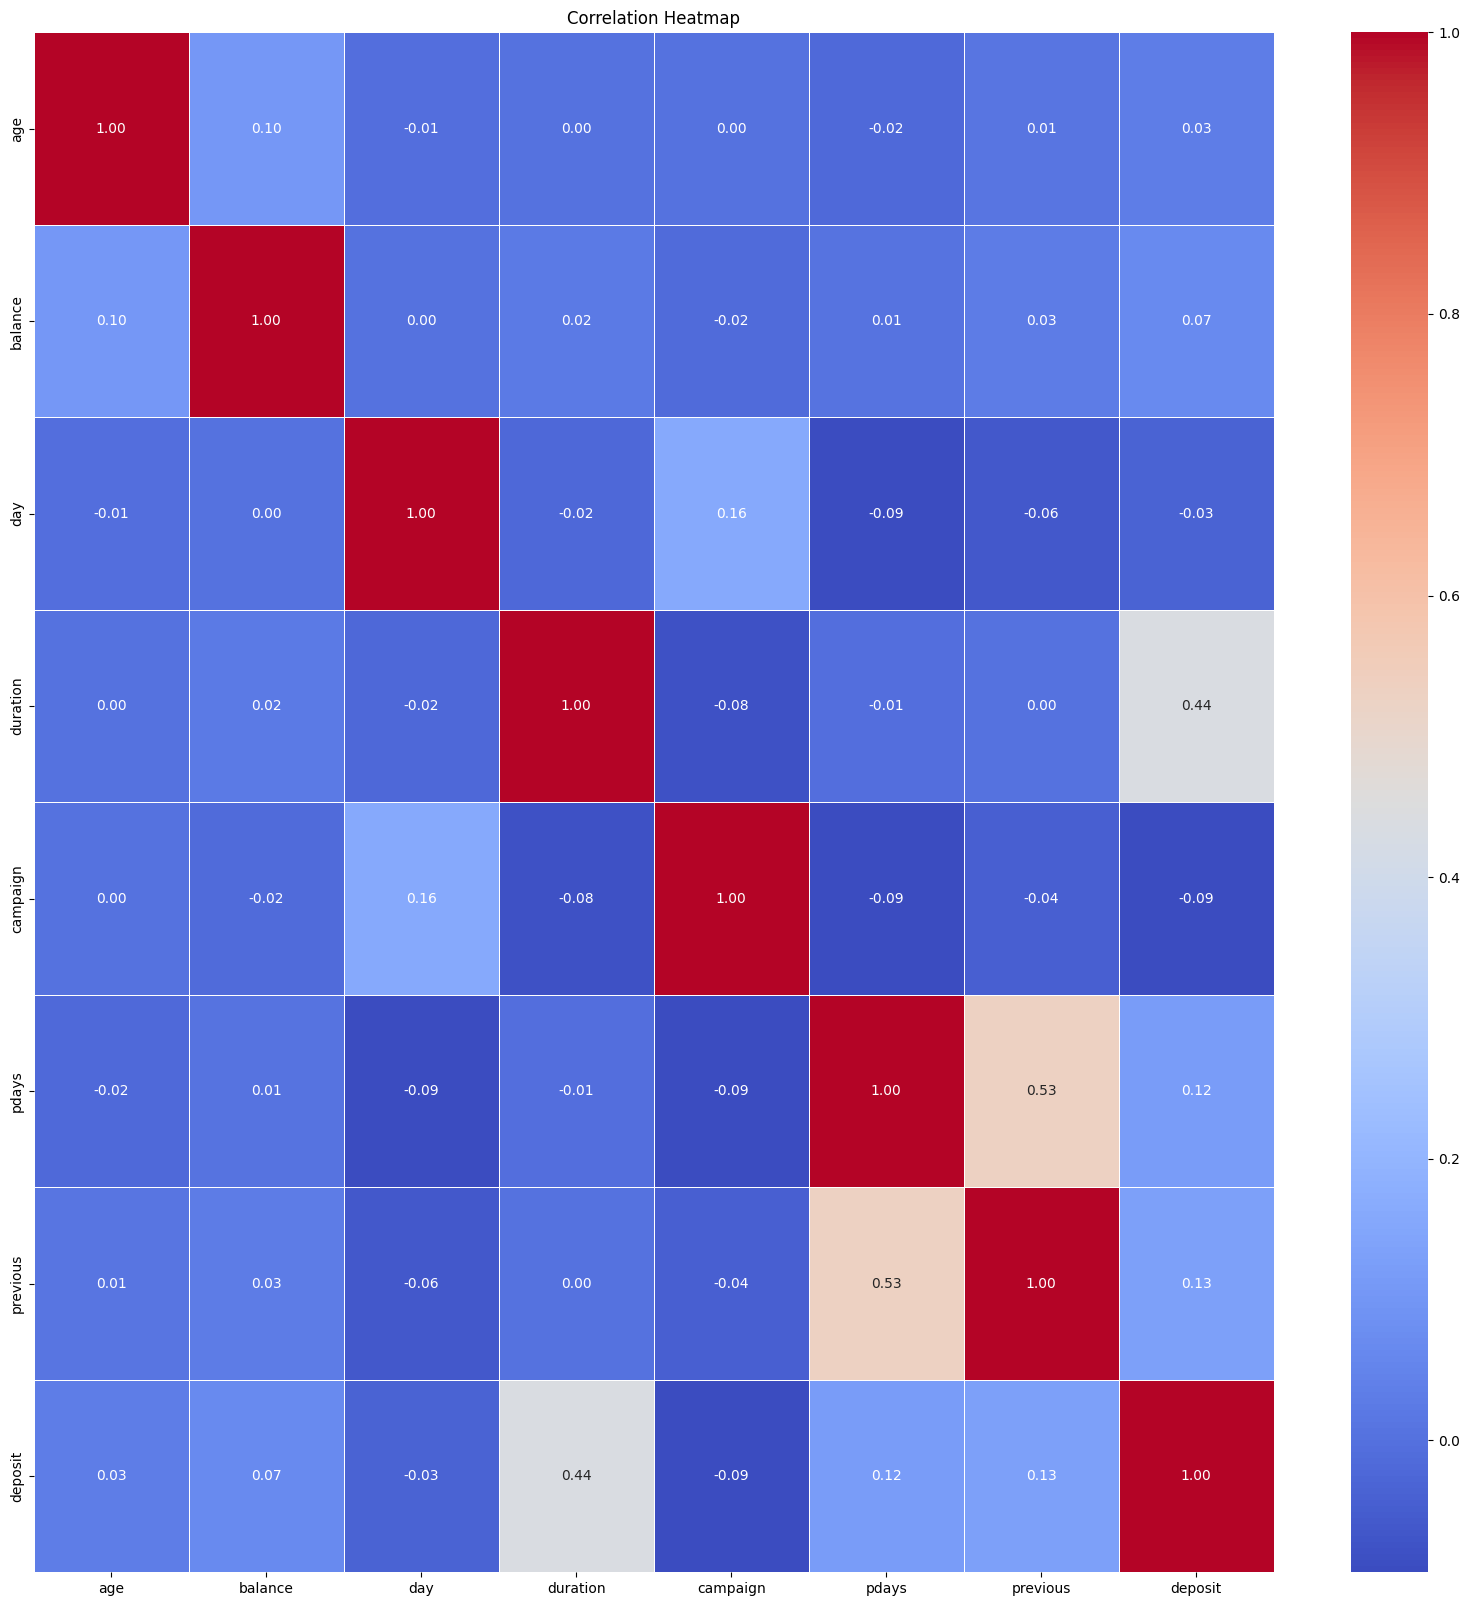

In [237]:
int_df = df.select_dtypes(include=['int64'])
correlation_matrix = int_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [238]:
deposit_correlations = correlation_matrix['deposit']
sorted_correlations = deposit_correlations.abs().sort_values(ascending=False)
top_attributes = sorted_correlations[1:]
print("Before cleaning")
print(top_attributes)

Before cleaning
duration    0.438794
previous    0.128757
pdays       0.118553
campaign    0.092108
balance     0.065703
day         0.034432
age         0.031884
Name: deposit, dtype: float64


# Cleaning

In [239]:
cleaned_df = df.copy()

## Drop Duplicates

In [240]:
cleaned_df = cleaned_df.drop_duplicates()

## Drop 1.5 IQR

In [241]:
cleaned_df = cleaned_df[cleaned_df['balance'] > 0]
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == 'int64'and column != "campaign" and column != "previous" and column != "pdays" and column != "poutcome" and column != "deposit":
        Q1 = cleaned_df[column].quantile(0.25)
        Q3 = cleaned_df[column].quantile(0.75)
        IQR = Q3 - Q1
        cleaned_df = cleaned_df[~((cleaned_df[column] < (Q1 - 1.5 * IQR)) | (cleaned_df[column] > (Q3 + 1.5 * IQR)))]

## Caping

In [242]:
# cleaned_df = cleaned_df[cleaned_df['balance'] > 0]

# for column in cleaned_df.columns:
#     if cleaned_df[column].dtype == 'int64' and column not in ["campaign", "previous", "pdays", "poutcome", "deposit"]:
#         Q3 = cleaned_df[column].quantile(0.75)  
#         cleaned_df[column] = np.where(cleaned_df[column] > Q3, Q3, cleaned_df[column])


## After Cleaning

### Cleaned Bar Chart

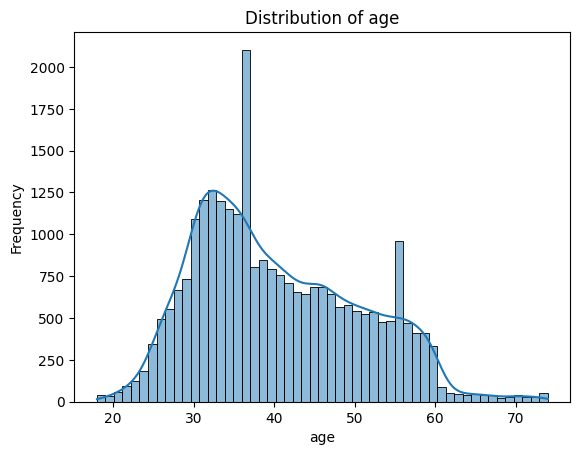

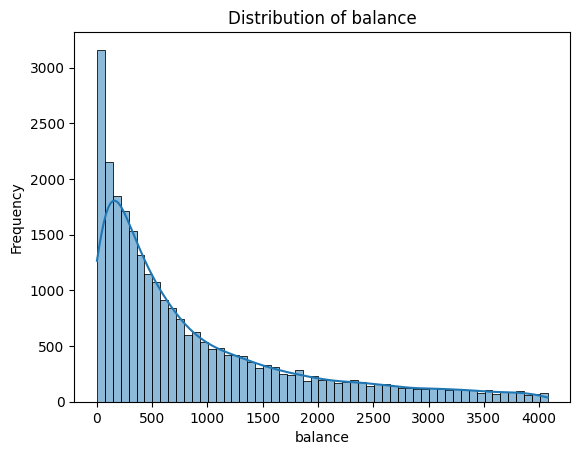

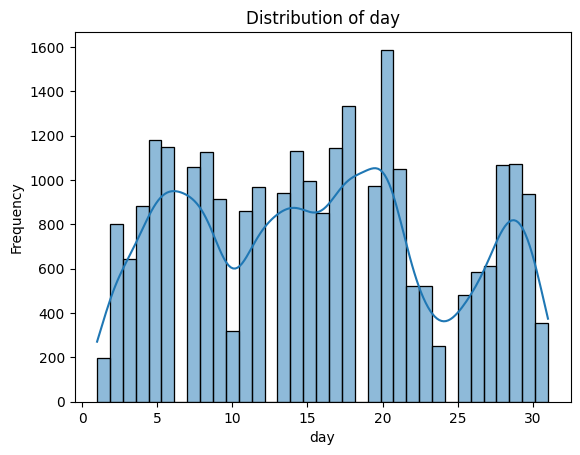

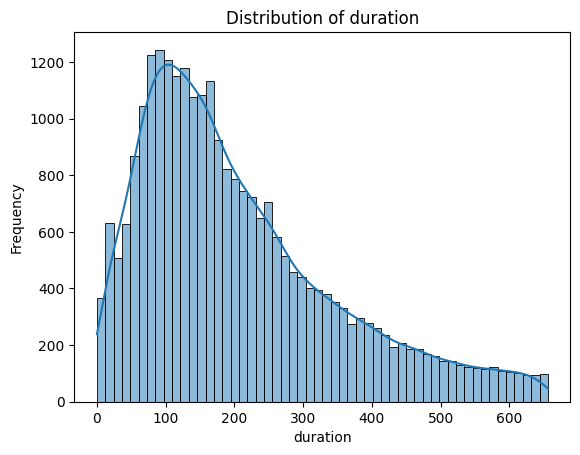

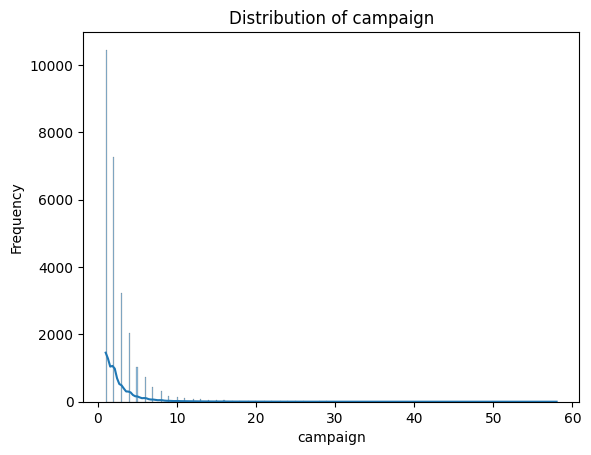

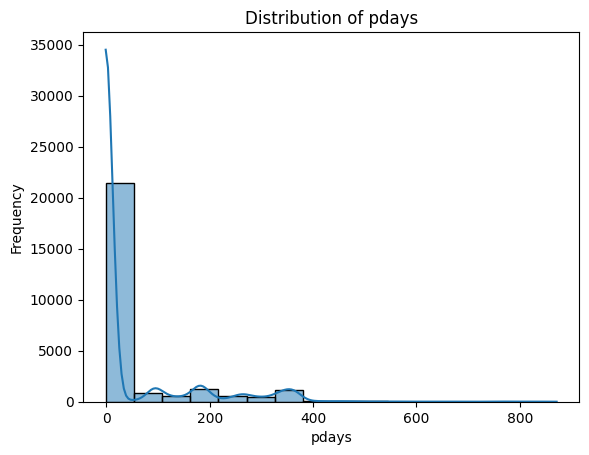

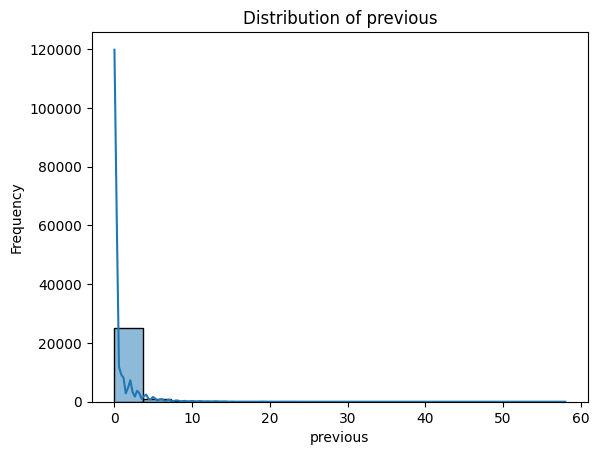

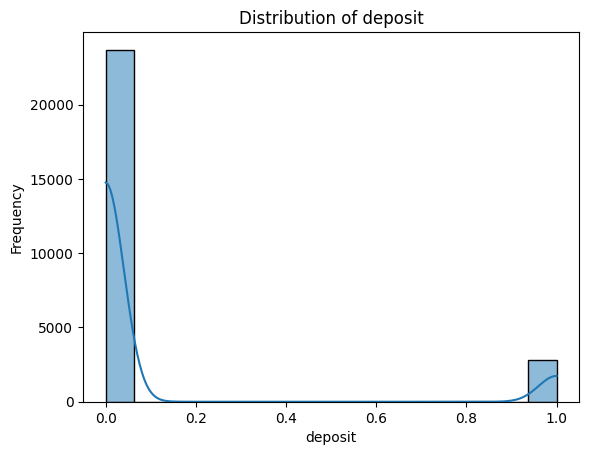

In [243]:
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == 'int64':
        plt.figure() 
        sns.histplot(cleaned_df[column], kde=True)  
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

### Cleaned Heatmap


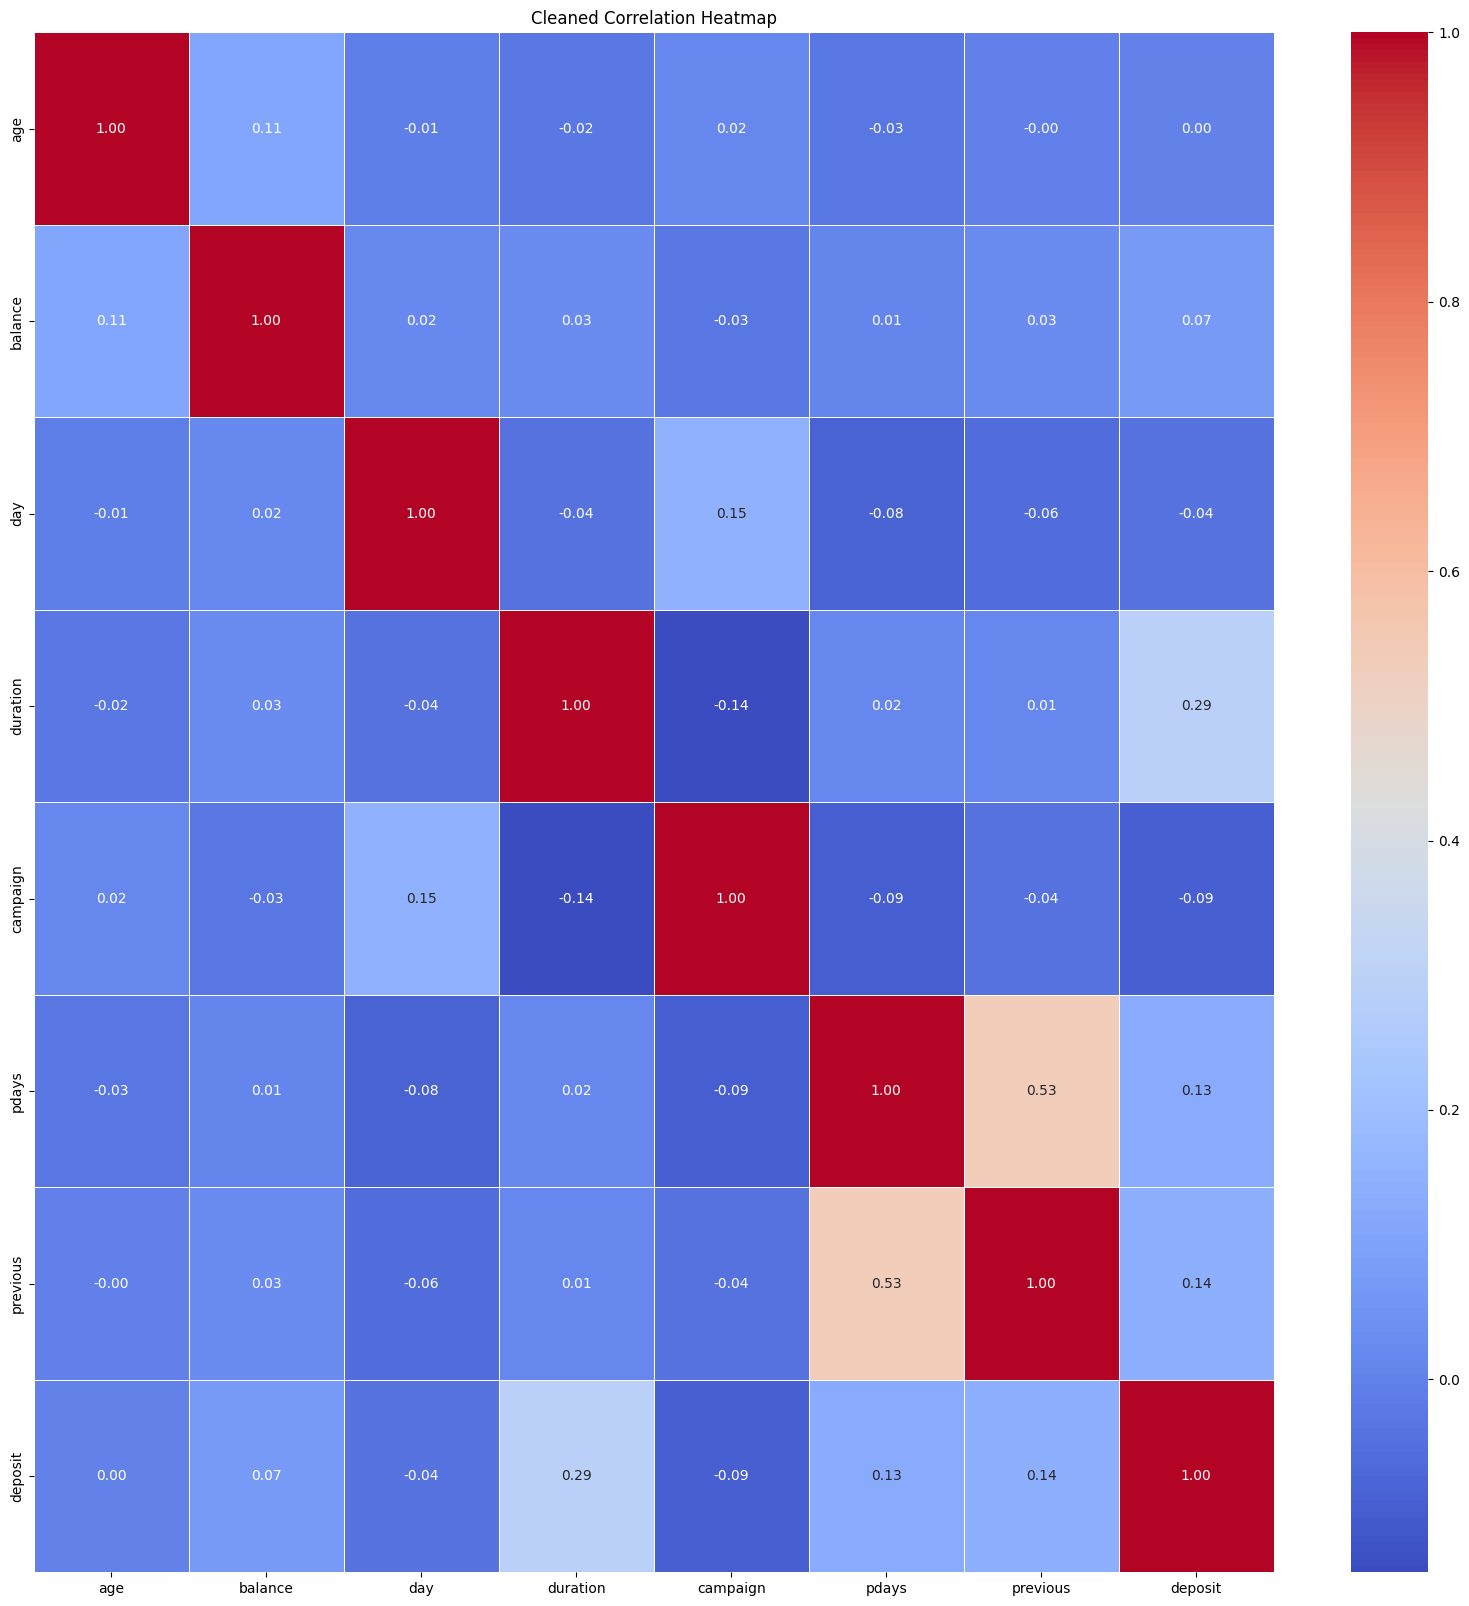

In [244]:
int_cleaned_df = cleaned_df.select_dtypes(include=['int64'])
cleaned_correlation_matrix = int_cleaned_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(cleaned_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Cleaned Correlation Heatmap')
plt.show()

In [245]:
cleaned_deposit_correlations = cleaned_correlation_matrix['deposit']
cleaned_sorted_correlations = cleaned_deposit_correlations.abs().sort_values(ascending=False)
cleaned_top_attributes = cleaned_sorted_correlations[1:] 
print("After cleaning")
print(cleaned_top_attributes)

After cleaning
duration    0.290191
previous    0.140609
pdays       0.129042
campaign    0.092639
balance     0.074444
day         0.037909
age         0.002034
Name: deposit, dtype: float64


# Feature Engineering

## One Hot Encoding


In [246]:
cleaned_cat_cols = cleaned_df.select_dtypes(include=["object", "category"]).columns.tolist()
for col in cleaned_cat_cols:
    ohe = pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep="_")
    cleaned_df = pd.concat([cleaned_df, ohe], axis=1)
    cleaned_df.drop(columns=[col], inplace=True)

In [247]:
for col in cleaned_df.columns:
    if cleaned_df[col].dtype == bool:
        cleaned_df[col] = cleaned_df[col].astype(int)

In [248]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26500 entries, 6211 to 15795
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  26500 non-null  int64
 1   balance              26500 non-null  int64
 2   day                  26500 non-null  int64
 3   duration             26500 non-null  int64
 4   campaign             26500 non-null  int64
 5   pdays                26500 non-null  int64
 6   previous             26500 non-null  int64
 7   deposit              26500 non-null  int64
 8   job_admin.           26500 non-null  int32
 9   job_blue-collar      26500 non-null  int32
 10  job_entrepreneur     26500 non-null  int32
 11  job_housemaid        26500 non-null  int32
 12  job_management       26500 non-null  int32
 13  job_retired          26500 non-null  int32
 14  job_self-employed    26500 non-null  int32
 15  job_services         26500 non-null  int32
 16  job_student          265

## Data Transformation

In [249]:
cleaned_df['balance'] = np.log1p(cleaned_df["balance"]) # Ini di log soalnya rangenya cukup besar 
cleaned_df['duration'] = np.log1p(cleaned_df["duration"]) # Ini di log soalnya rangenya cukup besar 
cleaned_df['age'] = np.sqrt(cleaned_df['age']) # Ini di root square soalnya rangenya ga terlalu besar 


## Feature Selection & Dimentionality Reduction

In [250]:
from sklearn.tree import DecisionTreeClassifier

In [251]:
model_RFE = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=25)

In [252]:
X_train = cleaned_df.drop(columns="deposit")
y = cleaned_df["deposit"]

In [253]:
model_RFE = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=25)
X_transformed = model_RFE.fit_transform(X_train=X_train, y=y)
selected_columns = X_train.columns[model_RFE.support_]
cleaned_df_transformed = pd.DataFrame(X_transformed, columns=selected_columns)
cleaned_df_transformed["deposit"] = y.values

In [254]:
cleaned_df_transformed

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
6211,6.480741,7.344719,27,5.609472,3,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
12005,6.244998,4.290459,7,6.054439,6,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
44250,6.480741,6.597146,20,3.526361,1,339,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
33007,6.164414,5.908083,20,4.859812,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
55958,6.244998,4.343805,15,5.303305,1,183,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54886,5.916080,2.944439,14,4.143135,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
11284,5.830952,1.386294,5,4.795791,3,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
54343,6.164414,4.521789,2,5.337538,1,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
38158,5.477226,4.143135,21,4.343805,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


## Balancing Target

In [278]:
# Perform SMOTE to oversample
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(cleaned_df_transformed.drop(columns="deposit"), cleaned_df_transformed["deposit"])

# Perform undersampling on the oversampled data
undersample = RandomUnderSampler(sampling_strategy=1, random_state=42)
X_final, y_final = undersample.fit_resample(X_resampled, y_resampled)

# Convert the result back to a DataFrame, keeping column names
resampled_data = pd.DataFrame(X_final, columns=cleaned_df_transformed.drop(columns="deposit").columns)
resampled_data["deposit"] = y_final  # Ensure the target column is updated as well

In [279]:
resampled_data

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_management,job_technician,...,month_apr,month_aug,month_feb,month_jun,month_mar,month_may,month_oct,month_sep,poutcome_success,deposit
19908,6.164414,4.897840,27.000000,5.590987,1.000000,-1.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0
1331,5.744563,5.484797,21.000000,5.924256,3.000000,-1.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0
1382,6.855655,6.816736,28.000000,4.779123,9.000000,-1.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
11250,5.567764,7.221836,12.000000,4.867534,4.000000,-1.000000,0.0,0.000000,1.000000,0.000000,...,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
8589,5.656854,7.099202,7.000000,4.682131,1.000000,344.000000,4.0,0.000000,0.000000,1.000000,...,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35555,6.685192,0.693147,6.000000,6.204369,1.963206,-1.000000,0.0,0.000000,0.963206,0.036794,...,0.0,0.963206,0.0,0.0,0.0,0.036794,0.0,0.0,0.0,1
35556,7.686706,4.596184,5.622114,6.091416,3.622114,-1.000000,0.0,0.000000,0.000000,0.377886,...,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
35557,5.292586,7.698458,4.000000,6.342847,7.190419,-1.000000,0.0,0.000000,0.809581,0.000000,...,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1
35558,6.873223,5.884609,20.917217,6.007942,1.000000,87.124174,6.0,0.958609,0.000000,0.041391,...,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,1


# Save CSV

In [280]:
cleaned_df.to_csv('../dataset/cleaned_df.csv', index=False)

In [281]:
df_deposit_0 = cleaned_df[cleaned_df['deposit'] == 0].sample(n=1000, random_state=42)
df_deposit_1 = cleaned_df[cleaned_df['deposit'] == 1].sample(n=1000, random_state=42)

subsampled_df = pd.concat([df_deposit_0, df_deposit_1])
subsampled_df = subsampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [282]:
subsampled_df.to_csv('../dataset/subsampled_df.csv', index=False)

In [283]:
df_deposit_0 = cleaned_df[cleaned_df['deposit'] == 0].sample(n=3, random_state=42)
df_deposit_1 = cleaned_df[cleaned_df['deposit'] == 1].sample(n=3, random_state=42)

mini_subsampled_df = pd.concat([df_deposit_0, df_deposit_1])
mini_subsampled_df = mini_subsampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [284]:
mini_subsampled_df.to_csv('../dataset/mini_subsampled_df.csv', index=False)

In [285]:
resampled_data.to_csv('../dataset/resampled_df.csv', index=False)

# Import

In [286]:
#Library
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

# Selfmade
import sys
sys.path.append('./src/supervised_learning')
sys.path.append('./src/unsupervised_learning')
sys.path.append('./src/ensemble')
from supervised_learning import KNN_Selfmade
from supervised_learning import KNN_Selfmade
from supervised_learning import Logistic_Regression_Selfmade
from supervised_learning import Gaussian_Naive_Bayes_Selfmade
from supervised_learning import CART_Selfmade
from supervised_learning import SVC_Selfmade
from supervised_learning import ANN_Selfmade
from unsupervised_learning import KMeans_Selfmade
from unsupervised_learning import DBSCAN_Selfmade
from unsupervised_learning import PCA_Selfmade
from ensemble import Ensemble_Bagging_Selfmade

# Read Dataset & Splitting

In [372]:
test_df = pd.read_csv("../dataset/test_df.csv")
train_df = pd.read_csv("../dataset/resampled_df.csv")

# Transform test to match train

In [373]:
test_df.dropna(inplace=True)

In [374]:
test_df['deposit'] = test_df['deposit'].map({'yes': 1, 'no': 0})

In [375]:
test_cat_cols = test_df.drop(columns="deposit").select_dtypes(include=["object", "category"]).columns.tolist()
for col in test_cat_cols:
    ohe = pd.get_dummies(test_df[col], prefix=col, prefix_sep="_")
    test_df = pd.concat([test_df, ohe], axis=1)
    test_df.drop(columns=[col], inplace=True)

In [376]:
for col in test_df.columns:
    if test_df[col].dtype == bool:
        test_df[col] = test_df[col].astype(int)

In [377]:
test_df['balance'] = np.log1p(test_df["balance"]) # Ini di log soalnya rangenya cukup besar 
test_df['duration'] = np.log1p(test_df["duration"]) # Ini di log soalnya rangenya cukup besar 
test_df['age'] = np.sqrt(test_df['age']) # Ini di root square soalnya rangenya ga terlalu besar 


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [378]:
X = test_df.drop(columns="deposit")
y = test_df["deposit"]

In [379]:
X_transformed = model_RFE.transform(X=X)
selected_columns = X.columns[model_RFE.support_]
test_df = pd.DataFrame(X_transformed, columns=selected_columns)
test_df["deposit"] = y.values

In [380]:
np.isinf(test_df).sum()

age                    0
balance               11
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_admin.             0
job_management         0
job_technician         0
marital_married        0
marital_single         0
education_tertiary     0
housing_no             0
loan_yes               0
contact_unknown        0
month_apr              0
month_aug              0
month_feb              0
month_jun              0
month_mar              0
month_may              0
month_oct              0
month_sep              0
poutcome_success       0
deposit                0
dtype: int64

In [381]:
test_df[np.isinf(test_df)] = np.nan

In [382]:
test_df.isnull().sum()

age                     0
balance               886
day                     0
duration                0
campaign                0
pdays                   0
previous                0
job_admin.              0
job_management          0
job_technician          0
marital_married         0
marital_single          0
education_tertiary      0
housing_no              0
loan_yes                0
contact_unknown         0
month_apr               0
month_aug               0
month_feb               0
month_jun               0
month_mar               0
month_may               0
month_oct               0
month_sep               0
poutcome_success        0
deposit                 0
dtype: int64

In [383]:
test_df.dropna(inplace=True)

# Split X_train and y

In [384]:
X_test = test_df.drop(columns='deposit')
y_test = test_df['deposit']
X_train = train_df.drop(columns='deposit')
y_train = train_df['deposit']

In [385]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [386]:
X_test.isnull().sum()

age                   0
balance               0
day                   0
duration              0
campaign              0
pdays                 0
previous              0
job_admin.            0
job_management        0
job_technician        0
marital_married       0
marital_single        0
education_tertiary    0
housing_no            0
loan_yes              0
contact_unknown       0
month_apr             0
month_aug             0
month_feb             0
month_jun             0
month_mar             0
month_may             0
month_oct             0
month_sep             0
poutcome_success      0
dtype: int64

In [387]:
np.isinf(X_test).sum()

age                   0
balance               0
day                   0
duration              0
campaign              0
pdays                 0
previous              0
job_admin.            0
job_management        0
job_technician        0
marital_married       0
marital_single        0
education_tertiary    0
housing_no            0
loan_yes              0
contact_unknown       0
month_apr             0
month_aug             0
month_feb             0
month_jun             0
month_mar             0
month_may             0
month_oct             0
month_sep             0
poutcome_success      0
dtype: int64

In [388]:
np.isinf(y_test).sum()

0

# Modelling & Testing

## KNN

### KNN Selfmade

#### KNN Hold-Out

In [398]:
model_knn_selfmade = KNN_Selfmade(neighbors=7, metric='euclidean')
model_knn_selfmade.fit(X_train, y_train)
y_pred_knn_selfmade = model_knn_selfmade.predict(X_test)

print(classification_report(y_test, y_pred_knn_selfmade))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      8368
           1       0.47      0.81      0.59      2021

    accuracy                           0.78     10389
   macro avg       0.71      0.79      0.72     10389
weighted avg       0.85      0.78      0.80     10389



#### KNN K-Fold

In [390]:
all_true_labels_knn_selfmade = []
all_pred_labels_knn_selfmade = []

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model_knn_selfmade = KNN_Selfmade(neighbors=7, metric='euclidean')
    model_knn_selfmade.fit(X_train_fold, y_train_fold)
    y_pred_knn_selfmade_fold = model_knn_selfmade.predict(X_test_fold)
    
    all_true_labels_knn_selfmade.extend(y_test_fold)
    all_pred_labels_knn_selfmade.extend(y_pred_knn_selfmade_fold)

print(classification_report(all_true_labels_knn_selfmade, all_pred_labels_knn_selfmade))


              precision    recall  f1-score   support

           0       0.95      0.79      0.86     11853
           1       0.82      0.96      0.88     11853

    accuracy                           0.87     23706
   macro avg       0.88      0.87      0.87     23706
weighted avg       0.88      0.87      0.87     23706



### KNN Library

In [394]:
model_knn_library = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
model_knn_library.fit(X_train, y_train)
y_pred_knn_library = model_knn_library.predict(X_test)

print(classification_report(y_test, y_pred_knn_library))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      8368
           1       0.47      0.81      0.59      2021

    accuracy                           0.78     10389
   macro avg       0.71      0.79      0.72     10389
weighted avg       0.85      0.78      0.80     10389



In [399]:
y_pred_knn_selfmade.shape

(10389,)

In [400]:
y_pred_knn_library.shape

(10389,)

### Comparing KNN

In [401]:
print(np.mean(y_pred_knn_selfmade == y_pred_knn_library))

1.0


Metrik yang digunakan: 
- precision: untuk menghitung berapa banyak prediksi positif model yang nyatanya benar positif. 
- recall: untuk menghitung berapa banyak label yang nyatanya positif dan berhasil diprediksi positif oleh model. 
- F1 score: gabungan precision dan recall. <br>
Namun jika hanya boleh memilih 1 metrik saja, saya akan menggunakan F1 score karena F1 score sudah mencakup precision dan recall dan prediksi deposit ini tidak akan berakibat fatal sampai menyebabkan korban jiwa. Selain itu, F1 score juga dapat menjaga keseimbangan antara false positive dan false negative.

## Logistic Regression

### Regression Selfmade

#### Log Reg Hold-Out

In [ ]:
model_log_reg_selfmade = Logistic_Regression_Selfmade(learning_rate=0.5, n_iterations=1000, regularization='l2', lambda_param=0.01, loss_function='logit')
model_log_reg_selfmade.fit(X_train, y_train)
y_pred_log_reg_selfmade = model_log_reg_selfmade.predict(X_test)

print(classification_report(y_pred_log_reg_selfmade, y_test))

Iteration 0, Loss: 0.6931471805599453
Iteration 100, Loss: 5.345647878363645
Iteration 200, Loss: 1.6704458635083905
Iteration 300, Loss: 1.392723568972864
Iteration 400, Loss: 1.6704458635668986
Iteration 500, Loss: 1.669074169735058
Iteration 600, Loss: 1.6704458635083905
Iteration 700, Loss: 1.6703559281557538
Iteration 800, Loss: 1.6701155739637668
Iteration 900, Loss: 1.6705283851828179
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4738
           1       0.00      0.67      0.01         3

    accuracy                           0.89      4741
   macro avg       0.50      0.78      0.47      4741
weighted avg       1.00      0.89      0.94      4741



#### Log Reg K-Fold

In [ ]:
all_true_labels_log_reg_selfmade = []
all_pred_labels_log_reg_selfmade = []

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model_log_reg_selfmade = Logistic_Regression_Selfmade(learning_rate=0.5, n_iterations=1000, regularization='l2', lambda_param=0.01, loss_function='cross_entropy')
    model_log_reg_selfmade.fit(X_train_fold, y_train_fold)
    y_pred_log_reg_selfmade = model_log_reg_selfmade.predict(X_test_fold)
    
    all_true_labels_log_reg_selfmade.extend(y_test_fold)
    all_pred_labels_log_reg_selfmade.extend(y_pred_log_reg_selfmade)

print(classification_report(all_true_labels_log_reg_selfmade, all_pred_labels_log_reg_selfmade))


Iteration 0, Loss: 0.6931471805599453
Iteration 100, Loss: 1.6879353407050581
Iteration 200, Loss: 1.6866944772547272
Iteration 300, Loss: 5.262685827951199
Iteration 400, Loss: 4.044412142662094
Iteration 500, Loss: 4.733367999249837
Iteration 600, Loss: 5.06798824458988
Iteration 700, Loss: 1.6878290728713625
Iteration 800, Loss: 1.453341704175215
Iteration 900, Loss: 1.7138180676814683
Iteration 0, Loss: 0.6931471805599453
Iteration 100, Loss: 5.26987250486387
Iteration 200, Loss: 1.2604823334307191
Iteration 300, Loss: 1.061862610528597
Iteration 400, Loss: 1.7001450369929503
Iteration 500, Loss: 1.2037611370841592
Iteration 600, Loss: 1.630947480535332
Iteration 700, Loss: 1.6571268797617942
Iteration 800, Loss: 1.375196642697852
Iteration 900, Loss: 1.978320473018829
Iteration 0, Loss: 0.6931471805599453
Iteration 100, Loss: 1.0010509364910825
Iteration 200, Loss: 5.233395098880928
Iteration 300, Loss: 0.9863911133634582
Iteration 400, Loss: 1.6534132981551874
Iteration 500, Loss

### Regression Library

In [ ]:
model_log_reg_library = LogisticRegression(max_iter=100, C=1/0.1, penalty='l2')
model_log_reg_library.fit(X_train, y_train)
y_pred_log_reg_library = model_log_reg_library.predict(X_test)

print(classification_report(y_pred_log_reg_library, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4741
           1       0.00      0.00      0.00         0

    accuracy                           0.89      4741
   macro avg       0.50      0.44      0.47      4741
weighted avg       1.00      0.89      0.94      4741



c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: Und

### Comparing Logistic Regression

In [ ]:
print(np.mean(y_pred_log_reg_selfmade == y_pred_log_reg_library))

0.9993672221050411


Metrik yang digunakan: 
- precision: untuk menghitung berapa banyak prediksi positif model yang nyatanya benar positif. 
- recall: untuk menghitung berapa banyak label yang nyatanya positif dan berhasil diprediksi positif oleh model. 
- F1 score: gabungan precision dan recall. <br>
Namun jika hanya boleh memilih 1 metrik saja, saya akan menggunakan F1 score karena F1 score sudah mencakup precision dan recall dan prediksi deposit ini tidak akan berakibat fatal sampai menyebabkan korban jiwa. Selain itu, F1 score juga dapat menjaga keseimbangan antara false positive dan false negative.

## Gaussian Naive Bayes

### Naive Bayes Selfmade

#### Naive Bayes Hold-Out

In [ ]:
model_naive_bayes_selfmade = Gaussian_Naive_Bayes_Selfmade()
model_naive_bayes_selfmade.fit(X_train, y_train)
y_pred_naive_bayes_selfmade = model_naive_bayes_selfmade.predict(X_test)

print(classification_report(y_pred_naive_bayes_selfmade, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4738
           1       0.00      0.33      0.00         3

    accuracy                           0.89      4741
   macro avg       0.50      0.61      0.47      4741
weighted avg       1.00      0.89      0.94      4741



#### Naive Bayes K-Fold

In [ ]:
all_true_labels_naive_bayes_selfmade = []
all_pred_labels_naive_bayes_selfmade = []

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model_naive_bayes_selfmade = Gaussian_Naive_Bayes_Selfmade()
    model_naive_bayes_selfmade.fit(X_train_fold, y_train_fold)
    y_pred_naive_bayes_selfmade = model_naive_bayes_selfmade.predict(X_test_fold)
    
    all_true_labels_naive_bayes_selfmade.extend(y_test_fold)
    all_pred_labels_naive_bayes_selfmade.extend(y_pred_naive_bayes_selfmade)

print(classification_report(all_true_labels_naive_bayes_selfmade, all_pred_labels_naive_bayes_selfmade))


              precision    recall  f1-score   support

           0       0.89      0.98      0.93     21064
           1       0.10      0.01      0.02      2642

    accuracy                           0.88     23706
   macro avg       0.50      0.50      0.48     23706
weighted avg       0.80      0.88      0.83     23706



### Naive Bayes Library

In [ ]:
model_naive_bayes_library = GaussianNB()
model_naive_bayes_library.fit(X_train, y_train)
y_pred_naive_bayes_library = model_naive_bayes_library.predict(X_test)

print(classification_report(y_pred_naive_bayes_library, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4738
           1       0.00      0.33      0.00         3

    accuracy                           0.89      4741
   macro avg       0.50      0.61      0.47      4741
weighted avg       1.00      0.89      0.94      4741



### Comparing Naive Bayes

In [ ]:
print(np.mean(y_pred_naive_bayes_selfmade == y_pred_naive_bayes_library))

1.0


Metrik yang digunakan: 
- precision: untuk menghitung berapa banyak prediksi positif model yang nyatanya benar positif. 
- recall: untuk menghitung berapa banyak label yang nyatanya positif dan berhasil diprediksi positif oleh model. 
- F1 score: gabungan precision dan recall. <br>
Namun jika hanya boleh memilih 1 metrik saja, saya akan menggunakan F1 score karena F1 score sudah mencakup precision dan recall dan prediksi deposit ini tidak akan berakibat fatal sampai menyebabkan korban jiwa. Selain itu, F1 score juga dapat menjaga keseimbangan antara false positive dan false negative.

## CART

### CART Selfmade

#### CART Hold Out

In [ ]:
model_CART_selfmade = CART_Selfmade(max_depth=3)
model_CART_selfmade.fit(X_train, y_train)
y_pred_CART_selfmade = model_CART_selfmade.predict(X_test)

print(classification_report(y_pred_CART_selfmade, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4739
           1       0.00      0.00      0.00         2

    accuracy                           0.89      4741
   macro avg       0.50      0.44      0.47      4741
weighted avg       1.00      0.89      0.94      4741



#### CART K-Fold

In [ ]:
all_true_labels_CART_selfmade = []
all_pred_labels_CART_selfmade = []

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model_CART_selfmade = CART_Selfmade(max_depth=3)
    model_CART_selfmade.fit(X_train_fold, y_train_fold)
    y_pred_CART_selfmade = model_CART_selfmade.predict(X_test_fold)
    
    all_true_labels_CART_selfmade.extend(y_test_fold)
    all_pred_labels_CART_selfmade.extend(y_pred_CART_selfmade)

print(classification_report(all_true_labels_CART_selfmade, all_pred_labels_CART_selfmade))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     21064
           1       0.00      0.00      0.00      2642

    accuracy                           0.89     23706
   macro avg       0.44      0.50      0.47     23706
weighted avg       0.79      0.89      0.84     23706



### CART Library

In [ ]:
model_CART_library = DecisionTreeClassifier(max_depth=3)
model_CART_library.fit(X_train, y_train)
y_pred_CART_library = model_CART_library.predict(X_test)

print(classification_report(y_pred_CART_library, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4740
           1       0.00      0.00      0.00         1

    accuracy                           0.89      4741
   macro avg       0.50      0.44      0.47      4741
weighted avg       1.00      0.89      0.94      4741



### Comparing CART

In [ ]:
print(np.mean(y_pred_CART_selfmade == y_pred_CART_library))

0.9997890740350137


Metrik yang digunakan: 
- precision: untuk menghitung berapa banyak prediksi positif model yang nyatanya benar positif. 
- recall: untuk menghitung berapa banyak label yang nyatanya positif dan berhasil diprediksi positif oleh model. 
- F1 score: gabungan precision dan recall. <br>
Namun jika hanya boleh memilih 1 metrik saja, saya akan menggunakan F1 score karena F1 score sudah mencakup precision dan recall dan prediksi deposit ini tidak akan berakibat fatal sampai menyebabkan korban jiwa. Selain itu, F1 score juga dapat menjaga keseimbangan antara false positive dan false negative.

## SVC

### SVC Selfmade

#### SVC Hold Out

In [ ]:
model_SVC_selfmade = SVC_Selfmade(learning_rate=0.1, lambda_param=0.01, n_iterations=100, kernel='polynomial')
model_SVC_selfmade.fit(X_train, y_train)
y_pred_SVC_selfmade = model_SVC_selfmade.predict(X_test)

print(classification_report(y_pred_SVC_selfmade, y_test))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74      3049
           1       0.32      0.10      0.15      1692

    accuracy                           0.60      4741
   macro avg       0.48      0.49      0.45      4741
weighted avg       0.52      0.60      0.53      4741



#### SVC K-Fold

In [ ]:
all_true_labels_SVC_selfmade = []
all_pred_labels_SVC_selfmade = []

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_tes_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model_SVC_selfmade = SVC_Selfmade(learning_rate=0.1, lambda_param=0.01, n_iterations=100, kernel='polynomial')
    model_SVC_selfmade.fit(X_train_fold, y_train_fold)
    y_pred_SVC_selfmade = model_SVC_selfmade.predict(X_test_fold)
    
    all_true_labels_SVC_selfmade.extend(y_test_fold)
    all_pred_labels_SVC_selfmade.extend(y_pred_SVC_selfmade)

print(classification_report(all_true_labels_SVC_selfmade, all_pred_labels_SVC_selfmade))


              precision    recall  f1-score   support

           0       0.89      0.83      0.86     21064
           1       0.10      0.16      0.12      2642

    accuracy                           0.75     23706
   macro avg       0.49      0.49      0.49     23706
weighted avg       0.80      0.75      0.77     23706



### SVC Library

In [ ]:
model_SVC_library = SVC(max_iter=100, kernel='poly')
model_SVC_library.fit(X_train.values, y_train.values)
y_pred_SVC_library = model_SVC_library.predict(X_test)

print(classification_report(y_pred_SVC_library, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.11      0.20      4741

    accuracy                           0.11      4741
   macro avg       0.50      0.06      0.10      4741
weighted avg       1.00      0.11      0.20      4741



c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_divis

### Comparing SVC

In [ ]:
print(np.mean(y_pred_SVC_selfmade == y_pred_SVC_library))

0.3568867327568024


Metrik yang digunakan: 
- precision: untuk menghitung berapa banyak prediksi positif model yang nyatanya benar positif. 
- recall: untuk menghitung berapa banyak label yang nyatanya positif dan berhasil diprediksi positif oleh model. 
- F1 score: gabungan precision dan recall. <br>
Namun jika hanya boleh memilih 1 metrik saja, saya akan menggunakan F1 score karena F1 score sudah mencakup precision dan recall dan prediksi deposit ini tidak akan berakibat fatal sampai menyebabkan korban jiwa. Selain itu, F1 score juga dapat menjaga keseimbangan antara false positive dan false negative.

## ANN

### ANN Selfmade

#### ANN Hold Out

In [ ]:
model_ANN_selfmade = ANN_Selfmade(sizes=[20, 25, 1], activation='sigmoid')
model_ANN_selfmade.train(X_train, y_train, X_test, y_test, batch_size=20, optimizer='sgd', l_rate=0.0001, beta=.9)
y_pred_ANN_selfmade = model_ANN_selfmade.predict(X_test)

print(classification_report(y_pred_ANN_selfmade, y_test))

ValueError: shapes (50,51) and (25,20) not aligned: 51 (dim 1) != 25 (dim 0)

#### ANN K-Fold

In [ ]:
all_true_labels_ANN_selfmade = []
all_pred_labels_ANN_selfmade = []

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model_ANN_selfmade = ANN_Selfmade(sizes=[51, 50, 1], activation='sigmoid')
    model_ANN_selfmade.train(X_train, y_train, X_test, y_test, batch_size=20, optimizer='sgd', l_rate=0.0001, beta=.9)
    y_pred_ANN_selfmade = model_ANN_selfmade.predict(X_test)
    
    all_true_labels_ANN_selfmade.extend(y_test)
    all_pred_labels_ANN_selfmade.extend(y_pred_ANN_selfmade)

print(classification_report(all_true_labels_ANN_selfmade, all_pred_labels_ANN_selfmade))


Epoch 1: 0.01s, train acc=0.50, train loss=16.97, test acc=0.50, test loss=0.72
Epoch 2: 0.03s, train acc=0.50, train loss=16.75, test acc=0.50, test loss=0.72
Epoch 3: 0.04s, train acc=0.50, train loss=16.75, test acc=0.50, test loss=0.71
Epoch 4: 0.05s, train acc=0.50, train loss=16.88, test acc=0.50, test loss=0.71
Epoch 5: 0.06s, train acc=0.50, train loss=16.88, test acc=0.50, test loss=0.71
Epoch 6: 0.08s, train acc=0.50, train loss=16.84, test acc=0.50, test loss=0.70
Epoch 7: 0.09s, train acc=0.50, train loss=16.75, test acc=0.50, test loss=0.70
Epoch 8: 0.10s, train acc=0.50, train loss=16.79, test acc=0.50, test loss=0.70
Epoch 9: 0.12s, train acc=0.50, train loss=16.84, test acc=0.50, test loss=0.70
Epoch 10: 0.13s, train acc=0.50, train loss=16.88, test acc=0.50, test loss=0.70
Epoch 1: 0.01s, train acc=0.50, train loss=17.96, test acc=0.50, test loss=0.70
Epoch 2: 0.03s, train acc=0.50, train loss=17.96, test acc=0.50, test loss=0.70
Epoch 3: 0.04s, train acc=0.50, train l

### ANN Library

In [ ]:
model_ANN_library = MLPClassifier(hidden_layer_sizes=(50,), activation='logistic', solver='sgd',
                    learning_rate_init=0.0001, max_iter=10, batch_size=20, momentum=0.9)
model_ANN_library.fit(X_train, y_train)
y_pred_ANN_library = model_ANN_library.predict(X_test)

print(classification_report(y_pred_ANN_library, y_test))

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.64      0.64      0.64        22
           1       0.56      0.56      0.56        18

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40



Metrik yang digunakan: 
- precision: untuk menghitung berapa banyak prediksi positif model yang nyatanya benar positif. 
- recall: untuk menghitung berapa banyak label yang nyatanya positif dan berhasil diprediksi positif oleh model. 
- F1 score: gabungan precision dan recall. <br>
Namun jika hanya boleh memilih 1 metrik saja, saya akan menggunakan F1 score karena F1 score sudah mencakup precision dan recall dan prediksi deposit ini tidak akan berakibat fatal sampai menyebabkan korban jiwa. Selain itu, F1 score juga dapat menjaga keseimbangan antara false positive dan false negative.

## K-Means Clustering

### K-Means Clustering Selfmade

In [ ]:
model_KMeans_selfmade = KMeans_Selfmade(n_clusters=2, max_iter=100)
model_KMeans_selfmade.fit(X_train)
y_pred_KMeans_selfmade = model_KMeans_selfmade.predict(X_test)

print(y_pred_KMeans_selfmade)

[0 1 0 ... 0 0 0]


### K-Means Clustering Library

In [ ]:
model_KMeans_library = KMeans(n_clusters=2, max_iter=100)
model_KMeans_library.fit(X_train)
y_pred_KMeans_library = model_KMeans_library.predict(X_test)

print(y_pred_KMeans_library)

[0 1 0 ... 0 0 0]


### Comparing KMeans

In [ ]:
print(classification_report(y_pred_KMeans_library, y_pred_KMeans_selfmade))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3838
           1       1.00      1.00      1.00       903

    accuracy                           1.00      4741
   macro avg       1.00      1.00      1.00      4741
weighted avg       1.00      1.00      1.00      4741



## DBSCAN

### DBSCAN Selfmade 

In [ ]:
model_DBSCAN_selfmade = DBSCAN_Selfmade(eps=200, min_samples=3, metric='euclidean', p=5)
model_DBSCAN_selfmade.fit(X_train)
y_pred_DBSCAN_selfmade = model_DBSCAN_selfmade.predict()

print(y_pred_DBSCAN_selfmade)

[0 0 0 ... 0 0 0]


### DBSCAN Library

In [ ]:
model_DBSCAN_library = DBSCAN(eps=200, min_samples=3).fit(X_train)
y_pred_DBSCAN_library = model_DBSCAN_library.labels_

print(y_pred_DBSCAN_library)

[0 0 0 ... 0 0 0]


In [ ]:
print(classification_report(y_pred_DBSCAN_library, y_pred_DBSCAN_selfmade))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     18965
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.90     18965
   macro avg       0.25      0.22      0.24     18965
weighted avg       1.00      0.90      0.95     18965



c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

## PCA

### PCA Selfmade

In [ ]:
kmeans = KMeans(n_clusters=3)

In [ ]:
model_PCA_selfmade = PCA_Selfmade(n_components=2)
label_pca = model_PCA_selfmade.fit_transform(X_train)
print("Transformed Data:\n", label_pca) 
print("Explained Variance:", model_PCA_selfmade.explained_variance)

y_pred_PCA_selfmade = kmeans.fit_predict(label_pca)
print(y_pred_PCA_selfmade)
 

Transformed Data:
 [[-3.08362673  0.07310286]
 [-2.3455435  -0.07164494]
 [-1.22367071 -1.49027116]
 ...
 [ 1.73402462 -0.67445632]
 [ 1.86413694  1.14399023]
 [ 2.65503031  1.36314364]]
Explained Variance: [0.1073105  0.08979331]
[0 0 0 ... 1 2 2]


### PCA Library

In [ ]:
model_PCA_library = PCA(n_components=2)
label_pca_library = model_PCA_library.fit_transform(X_train)

print("Transformed Data (Library):\n", label_pca_library)
print("Explained Variance (Library):", model_PCA_library.explained_variance_ratio_)

y_pred_PCA_library = kmeans.fit_predict(label_pca_library)
print(y_pred_PCA_library)


Transformed Data (Library):
 [[-61.17792012  11.47480575]
 [-61.16218863   5.54706328]
 [-61.19782663  12.7573182 ]
 ...
 [-61.11202297  -9.47801254]
 [-61.11814427 -10.45856994]
 [-61.15743123   5.85620764]]
Explained Variance (Library): [0.99362849 0.0052514 ]
[1 1 1 ... 1 1 1]


In [ ]:
print(classification_report(y_pred_PCA_library, y_pred_PCA_selfmade))

              precision    recall  f1-score   support

           0       0.06      0.24      0.10      1675
           1       0.60      0.28      0.39     13507
           2       0.24      0.39      0.30      3783

    accuracy                           0.30     18965
   macro avg       0.30      0.30      0.26     18965
weighted avg       0.48      0.30      0.34     18965



## Bagging

### Bagging Selfmade

In [ ]:
model_bagging_selfmade = Ensemble_Bagging_Selfmade(base_estimator=DecisionTreeClassifier, n_estimators=5, max_samples=0.6)

model_bagging_selfmade.fit(X_train, y_train)
y_pred_bagging_selfmade = model_bagging_selfmade.predict(X_test)

print(classification_report(y_pred_bagging_selfmade, y_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      4601
           1       0.03      0.13      0.05       140

    accuracy                           0.87      4741
   macro avg       0.50      0.51      0.49      4741
weighted avg       0.94      0.87      0.90      4741

